<a href="https://colab.research.google.com/github/attiilla/TrabalhosPraticos-UFMG/blob/master/FEC/9%20-%20Automatos%20Celulares%20e%20Propagac%CC%A7a%CC%83o%20de%20doenc%CC%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [56]:
def Population(n: np.uint, m:np.uint , k = 0):
  ### Inicia uma população saudável de dimensão n x m em forma de um array 1d
  return (np.full(n*m,k),n,m)

def UpRightDownLeft(Pop):
  ### Recebe uma população e retorna uma tabela de vizinhos
  ### viz[i][0] é o índice do vizinho de cima de i no array 1d
  ### viz[i][1] é o vizinho da direita
  ### viz[i][2] é o vizinho de baixo
  ### viz[i][3] é o vizinho da esquerda
  n = Pop[1]
  m = Pop[2]
  s = n*m
  viz = np.empty((s,4))
  for i in range(s):
    viz[i][0] = (i-m)%s
    if (i+1)%m==0:
      viz[i][1] = np.floor(i/m)*m
    else:
      viz[i][1] = i+1
    viz[i][2] = (i+m)%s
    if (i)%m==0:
      viz[i][3] = (i-1)+m
    else:
      viz[i][3] = i-1
  return viz

def SingleTransition(Rates, viz, Pop):
  ### Dado as taxas de infecção/cura, a tabela de vizinhos e a população
  ### Computa e retorna o próximo estado da população
  sprdRate = Rates[0]
  cureRate = Rates[1]
  ans = (Pop[0].copy(),Pop[1],Pop[2])
  for i in range(len(Pop[0])):
    if Pop[0][i]==0:
      for j in viz[i]:
        if (Pop[0][int(j)]==-1):
          if (np.random.rand()<sprdRate):
            ans[0][i] = -1
    elif Pop[0][i]<0:
      if(np.random.rand()<cureRate):
        ans[0][i] = 1
  return ans

'''def SquareToStraight(l, columns: np.uint):
  i = l[0]
  j = l[1]
  return i*columns+j'''

def SetInfection(Pop,arr):
  ### Chamado para setar algumas células como doentes no início da simulação
  for i in arr:
    Pop[0][i] = -1

'''def GetRandomRates():
  ans = []
  odds = (np.random.uniform(0, 1),np.random.uniform(0, 1))
  ans.append(odds)
  odds = (np.random.uniform(0, 0.5),np.random.uniform(0, 0.8))
  ans.append(odds)
  odds = (np.random.uniform(0, 0.3),np.random.uniform(0, 0.5))
  if odds[0]>odds[1]:
    odds = (odds[1],odds[0])
  ans.append(odds)
  return ans'''

def GetRandomZeroList(popSize: np.uint, infected: np.uint):
  ### Recebe o tamanho da população e um número n
  ### Retorna uma escolha aleatória de n indivíduos que devem estar infectados
  ### no início da simulação
  return np.random.choice(np.arange(0, popSize), infected, replace=False)

def CoolPlot(Pop):
  ### Recebe uma população como um array 1d e retorna a população em uma
  ### forma boa para vizualização
  n = Pop[1]
  m = Pop[2]
  mat = np.reshape(Pop[0], (n, m))
  image = np.zeros((n, m, 3))
  for i in range(n):
    for j in range(m):
      if mat[i][j]==0:
        color = np.array([100,200,230])/255
      elif mat[i][j]==1:
        color = np.array([2,150,54])/255
      else:
        color = np.array([220,50,50])/255
      image[i][j] = color

  #plt.imshow(image)
  #plt.axis('off')
  #plt.show()
  return image


def RunModelSIR(N: np.uint, M: np.uint, spreadRate=0.2, cureRate=0.15, zerosNumber=1, runs=10, fpms=500, useSeed = False, ZeroSeed = [0]):
    ### Roda o modelo SIR e retorna uma animação da evolução do modelo
    ### zerosNumber: número de indivíduos infectados no tempo 0
    ### spreadRate/cureRate: taxa de infecção e cura da doença
    ### runs: número de vezes que a o estado da população inicial será alterada
    ### fpms: quantos frames por segundo estarão presentes na animação
    ### useSeed: booleano que determina se o programa vai ou não receber uma lista de indivíduos infectados no tempo 0
    ### ZeroSeed: lista de números representando a posição dos indivídios infectados no tempo 0
    ###           esses números são os índices dos indivíduos no array 1d da população
    Pop = Population(N, M)
    Viz = UpRightDownLeft(Pop)
    if useSeed:
      Zeros = ZeroSeed
    else:
      Zeros = GetRandomZeroList(N * M, zerosNumber)
    SetInfection(Pop, Zeros)
    rates = (spreadRate, cureRate)
    Evo = CoolPlot(Pop)
    Evolution = [Evo]
    fig, ax = plt.subplots()
    image = ax.imshow(Evolution[0], cmap='binary')

    def update(frame):
        image.set_data(Evolution[frame])

    for i in range(runs):
        Pop = SingleTransition(rates, Viz, Pop)
        Evolution.append(CoolPlot(Pop))

    anim = FuncAnimation(fig, update, frames=len(Evolution), interval=fpms)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    return Zeros, rates, Evolution

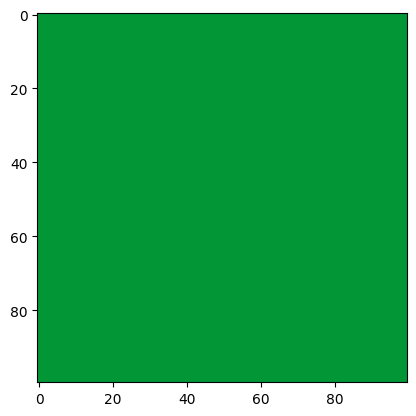

In [58]:
rec = RunModelSIR(100, 100, 1, 1, zerosNumber = 3, runs=300, fpms=100)